# Erstellen einer Datenbank für die Interpolation von omega_model
Für oblique flames

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import special

In [52]:
# Funktionen

def Icsolexpb1(x,m,a):
    return_value = 0.5*(1+ np.exp(1/(4*a) + x) * (m/(1+m))**(1/m) + 
                        ( np.exp(-a*(x**2 + (np.log(1 + 1/m)**2)/m**2)) * (1+ 1/m)**(2*a*x/m) / (np.sqrt(a)*np.sqrt(np.pi))) 
                        + x - np.exp(1/(4*a) + x) * (1 + 1/m)**(-1/m) * special.erf( (1+2*a*x - (2*a*np.log(1+1/m))/m)/(2*np.sqrt(a)) )
                        - (np.log(1 + 1/m)/m) + special.erf( (np.sqrt(a) * (m*x - np.log(1+1/m)) ) / m ) * (1 + x - ( (np.log(1+1/m)) / m))
                       )
    return return_value


def cmean0a(xm,delta,m,a):
    return (Icsolexpb1(xm + delta / 2, m, a) - Icsolexpb1(xm - delta / 2, m, a)) / delta


def Iapproxomr(x, xm, m, delta):
    return_value = (59*np.sqrt(a)*np.exp(-0.5*((19 + 2*a*np.power(delta,2))*np.power(x,2) - 38*x*xm + 19*np.power(xm,2))/
                                         np.power(delta,2) + (2*a*x*np.log(1 + 1/m))/m - 
                                         (a*np.power(np.log(1 + 1/m),2))/np.power(m,2))*(-38*np.sqrt(19 + 2*a*np.power(delta,2))*m*((19 + 2*a*np.power(delta,2))*m*x - 
                                                                                                                                    (19 + 4*a*np.power(delta,2))*m*xm +2*a*np.power(delta,2)*np.log(1 + 1/m)) + 
                                                                                         delta*np.exp(np.power((19 + 2*a*np.power(delta,2))*m*x - 19*m*xm -
                                                                                                               2*a*np.power(delta,2)*np.log(1 + 1/m),2)/(2.*np.power(delta,2)*(19 + 2*a*np.power(delta,2))*
                                                                                                               np.power(m,2)))*np.sqrt(2*np.pi)*
                                                                                         special.erf(((19 + 2*a*np.power(delta,2))*m*x - 19*m*xm - 2*a*np.power(delta,2)*
                                                                                                 np.log(1 + 1/m))/(delta*np.sqrt(38 + 4*a*np.power(delta,2))*m))*
                                                                                         (np.power(m,2)*(1083 + 190*a*np.power(delta,2) +
                                                                                                         np.power(a,2)*(8*np.power(delta,4) + 76*np.power(delta,2)*np.power(xm,2))) -
                                                                                          152*np.power(a,2)*np.power(delta,2)*m*xm*np.log(1 + 1/m) +76*np.power(a,2)*np.power(delta,2)*
                                                                                          np.power(np.log(1 + 1/m),2))))/(200.*np.power(19 + 2*a*np.power(delta,2),2.5)*np.power(m,2)*np.sqrt(np.pi))
    
    return return_value


def ommeanapproxr(xm,m,delta):
    return (Iapproxomr(xm + delta / np.sqrt(2), xm, m, delta) - Iapproxomr(xm - delta / np.sqrt(2), xm, m, delta)) /delta



### Variablen und Konstanten


In [194]:
m=49/11 
a=3.8

xi_vector = np.linspace(-10,5,1000)

In [195]:
#cmean0a(xi_vector,0.5,m,a)

In [196]:
#ommeanapproxr(xi_vector,m,0.5)

/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in multiply
/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in multiply
/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


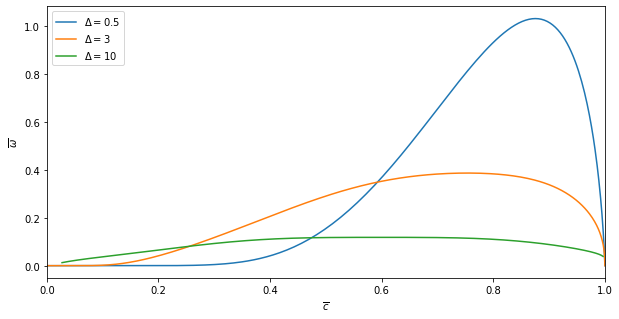

In [198]:
plt.figure(figsize=(10,5))
plt.plot(cmean0a(xi_vector,0.5,m,a),ommeanapproxr(xi_vector,m,0.5))
plt.plot(cmean0a(xi_vector,3,m,a),ommeanapproxr(xi_vector,m,3))
plt.plot(cmean0a(xi_vector,10,m,a),ommeanapproxr(xi_vector,m,10))
plt.xlabel('$\overline{c}$')
plt.ylabel('$\overline{\omega}$')
plt.xlim(0,1)
#plt.ylim(0,1)
plt.legend(['$\Delta=0.5$','$\Delta=3$','$\Delta=10$'])

## Erstellen der Datenbank

    --> delta_xi = n * 1.792/11.14

In [199]:
#cmean0a(xi_vector,10,m,a)

In [200]:
c_grid_for_interpolation = np.linspace(0, 1, num=1001)

delta_xi_max = 1.79/11.14*50

delta_xi_grid = np.linspace(0.001,delta_xi_max,101)

#c_grid = cmean0a(xi_vector,10,m,a)
#omega = ommeanapproxr(xi_vector,m,10)

# SAVE THE C_GRID and DELTA_XI_GRID
np.save('omega_interploation_database/c_grid.npy', c_grid_for_interpolation)
np.save('omega_interploation_database/delta_xi_grid.npy', delta_xi_grid)



In [201]:
# LOOP OVER DELTAS and STORE TO ARRAY

omega_array = np.zeros((len(delta_xi_grid),len(c_grid_for_interpolation)))


for idx,delta in enumerate(delta_xi_grid):
    c_vec = cmean0a(xi_vector,delta,m,a)
    omega_vec = ommeanapproxr(xi_vector,m,delta)
    
    omega_interpolated = np.interp(c_grid_for_interpolation, c_vec, omega_vec)
    # replace NaNs
    omega_interpolated[np.isnan(omega_interpolated)] = 0
    
    # save to array
    omega_array[idx,:] = omega_interpolated

omega_array[np.isinf(omega_array)] = 0

/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in multiply
/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp
/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in multiply
/home/max/.local/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in multiply


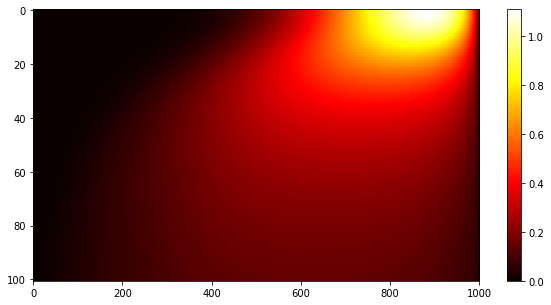

In [202]:
plt.figure(figsize=(10,5))
plt.imshow(omega_array,cmap='hot',aspect='auto')
plt.colorbar()

In [204]:
# Save omega array
np.save('omega_interploation_database/omega_array.npy', omega_array)

## Test for interpolation

In [213]:
test_c = 0.000000000001
test_delta = 1

index_c = np.argmin(np.abs(c_grid_for_interpolation - test_c))
index_delta = np.argmin(np.abs(delta_xi_grid - test_delta))

#a[index] # here is your result

In [214]:
omega_array[index_delta,index_c]

5.6638341233971535e-133

In [215]:
#loaded_array = np.load('omega_interploation_database/omega_array.npy')

array([[3.22983226e-167, 6.60506772e-081, 9.30345362e-066, ...,
        1.18062154e-001, 6.85121799e-002, 3.41949768e-041],
       [1.29072600e-166, 1.32586687e-080, 1.64850267e-065, ...,
        1.17632495e-001, 6.82542873e-002, 3.57599894e-015],
       [2.49967657e-165, 6.91231629e-080, 6.63691948e-065, ...,
        1.16434816e-001, 6.75433963e-002, 1.28385352e-040],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.34732959e-002, 3.86261305e-002, 1.74828637e-002],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.31363170e-002, 3.83675465e-002, 1.83914790e-002],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.27990621e-002, 3.81059858e-002, 1.92857265e-002]])